# Explore here

In [7]:
import pandas as pd
#Paso 1: Recopilación de datos

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#crear base de datos en carpeta 'raw'
df.to_csv("../data/raw/insurance_data.csv", index = False)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#eliminar duplicados
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [10]:
#Función util para identificar el tipo de variable: Categórica o Numérica
def separar_columnas(df):
    categoricas = []
    numericas = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [11]:
df.drop(['sex','region','children'], axis = 1, inplace = True)
df.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


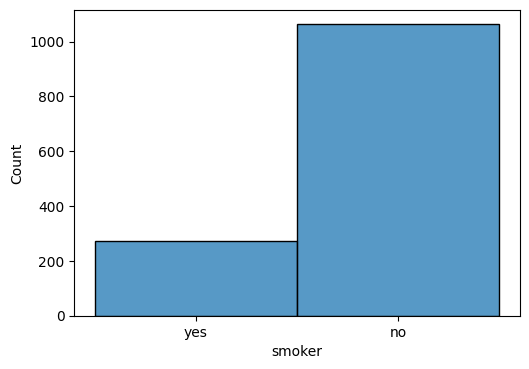

In [12]:
# Analisis de variables univariadas, analisis de variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear Histograma

sns.histplot(ax = axis[0,0], data = df, x = "smoker")


fig.delaxes(axis[0, 1])
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

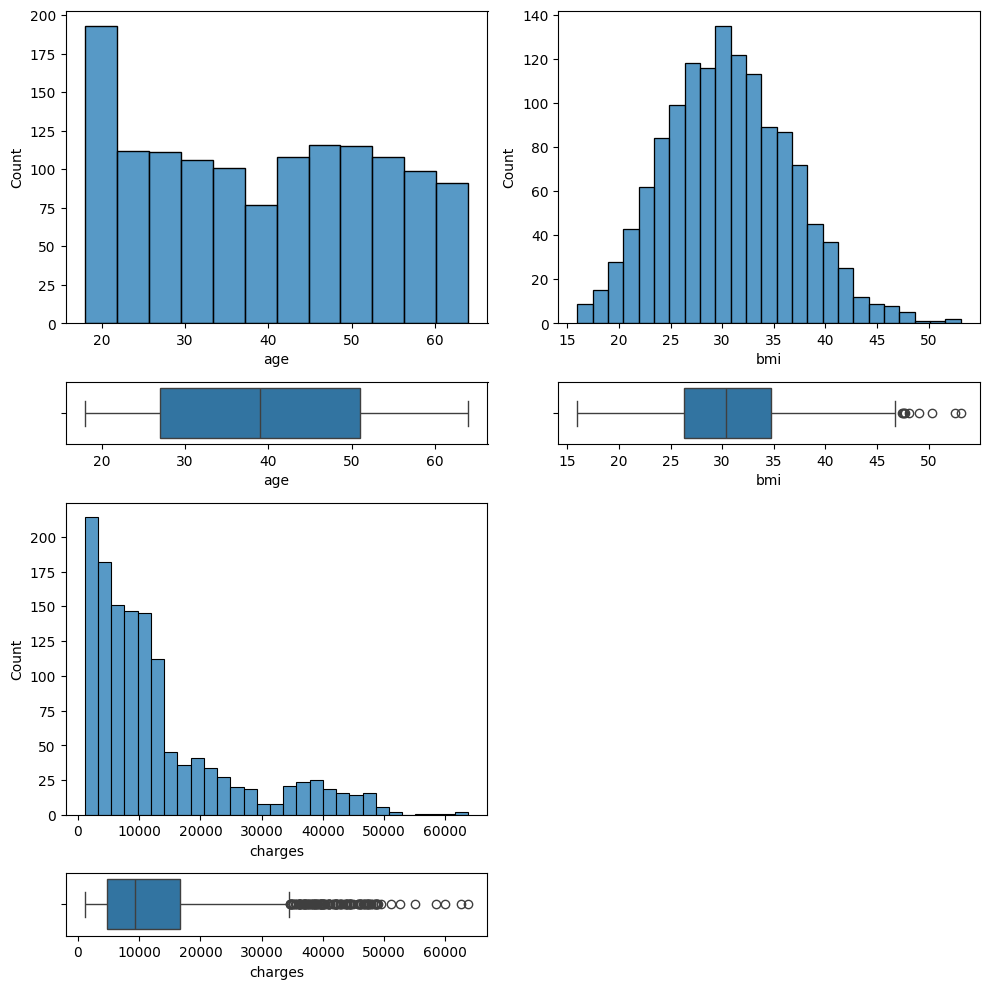

In [13]:
# Analisis de variables univariadas, analisis de variables numéricas
fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='charges')
sns.boxplot(ax=axis[3,0],data=df,x='charges')


fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

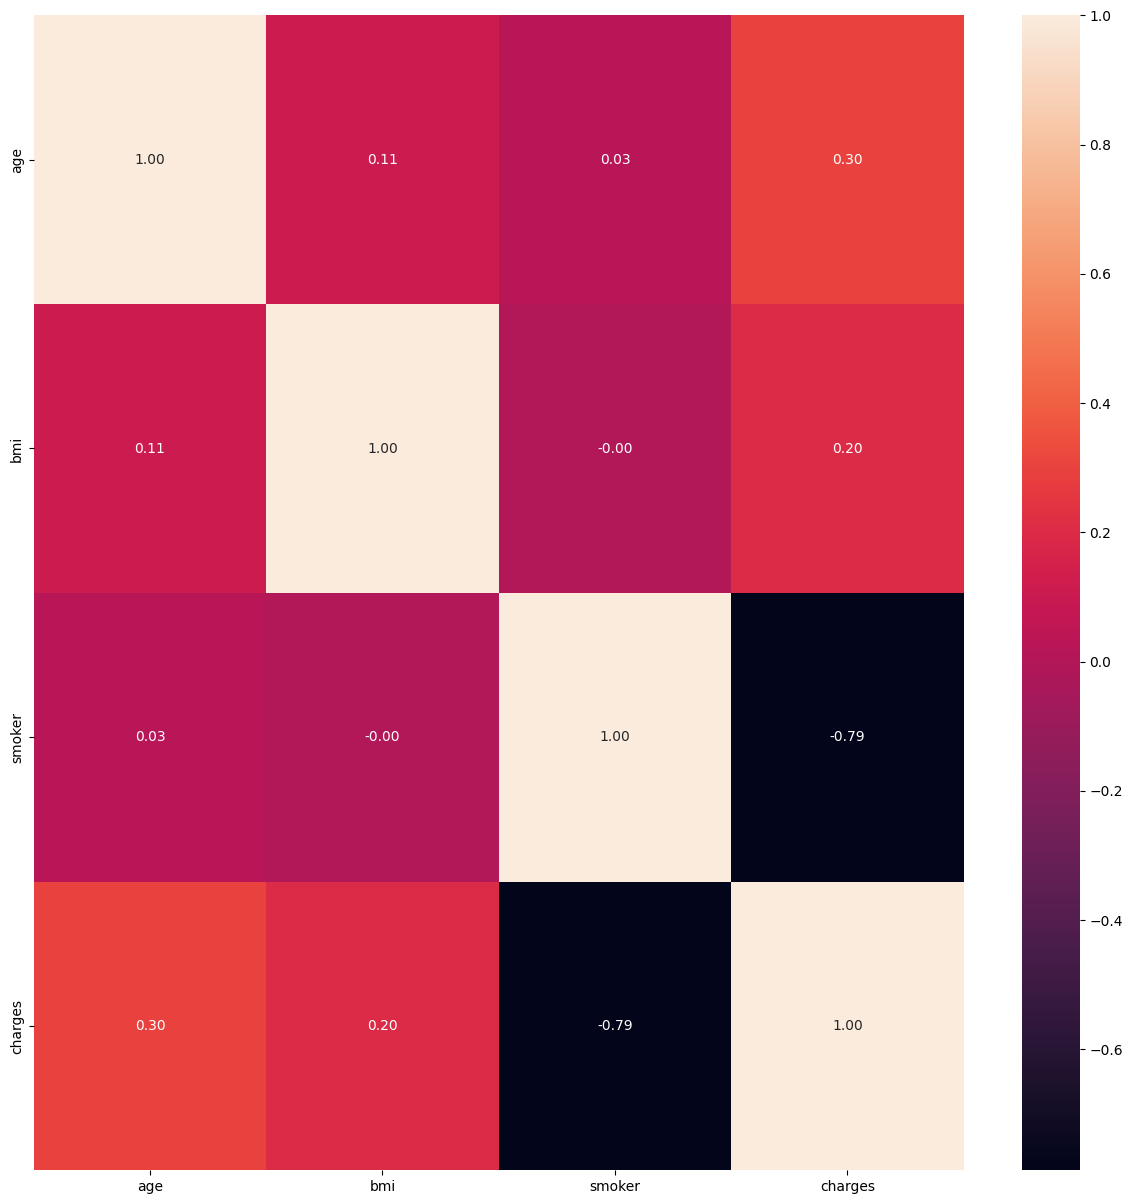

In [14]:
    #Análisis de todas las correlaciónes
    # Factorización de variables cátegoricas
df['smoker'] = pd.factorize(df['smoker'])[0]

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

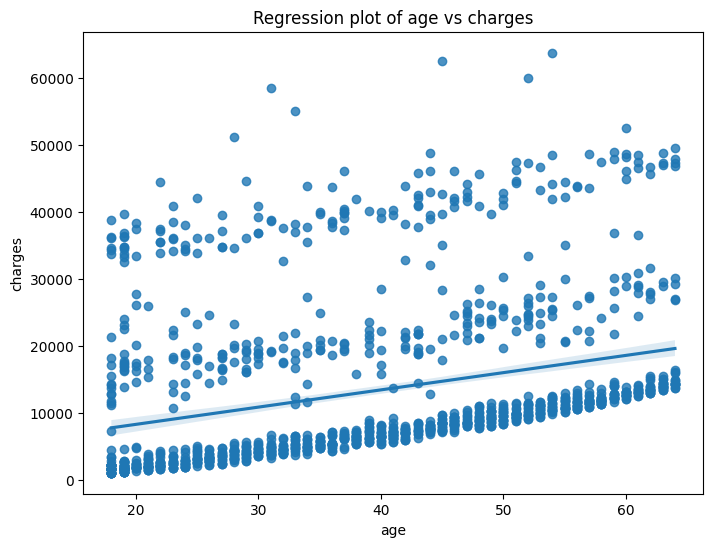

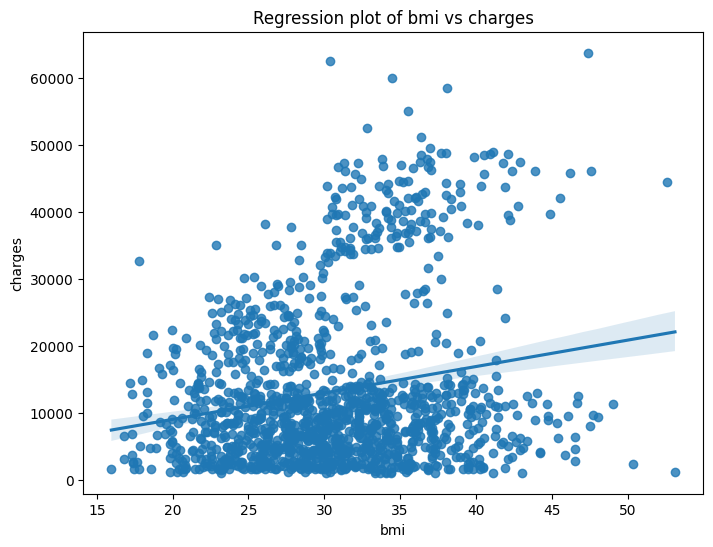

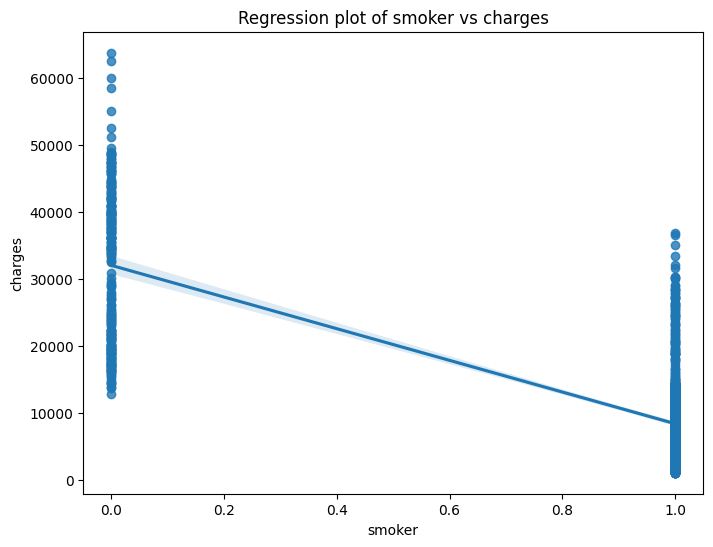

In [15]:
# Regplot para cada variable independiente vs variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns
objetivo = 'charges'
independent_vars = df.columns.difference([objetivo])

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[var], y=df[objetivo])
    plt.title(f'Regression plot of {var} vs {objetivo}')
    plt.show()

In [16]:
#normalizar variables independientes

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_para_normalizar = ["age","bmi","smoker"]
col_escaladas = scaler.fit_transform(df[columnas_para_normalizar])

df_escalado = pd.DataFrame(col_escaladas, columns=["age","bmi","smoker"])
df_escalado['charges'] = df['charges'].values

df_escalado.head()

,age,bmi,smoker,charges
0,0.021739,0.321227,0.0,16884.92400
1,0.000000,0.479150,1.0,1725.55230
2,0.217391,0.458434,1.0,4449.46200
3,0.326087,0.181464,1.0,21984.47061
4,0.304348,0.347592,1.0,3866.85520


In [17]:
#dividir en train y test
from sklearn.model_selection import train_test_split

X = df_escalado.drop("charges", axis=1)
y = df_escalado["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f"intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")
print(columnas_para_normalizar)

intercepto: 21701.79391257018
Coeficientes: [ 11586.30415359  11329.51105637 -23074.26173498]
['age', 'bmi', 'smoker']


In [20]:
y_pred = model.predict(X_test)
print(y_pred)

[ 8433.67443577  4336.46678013 13165.0382606  30593.69534864
  8738.64384303 13004.1887831  29273.63576136  2177.09021482
 10922.95093736 10315.83022735 11021.84491859 33740.33309282
 30613.92158231 18004.87150727  9656.23179762  9311.37354392
  4325.12010919 32099.96630635  3001.71338943  5552.62898392
  4325.12010919 29913.00795743 14580.01800456 30752.45719245
 31444.92261851  4769.02189756 35187.05259131 37413.46842278
 10952.8675722  12177.75978526  6505.9651105  13121.95183512
   870.87899962 12471.87695664 40355.37672202 12499.04467281
  2732.11267963  2866.20850841 32023.18474965  9365.1280589
  6903.0538664  29243.81679061 34097.79751626 11919.91981386
  6896.22734444  4145.55111435  6040.33037213  9173.38425823
  4186.69945959  8909.59778913  6340.1295272  12053.6361681
 30836.41015271  4425.70495311 10719.84316929  9666.05445578
 10530.02015238  2388.64618173 31511.97918113  8879.94566829
 14211.20691017  8472.07386235 11998.05853343  1725.85017296
 15951.34770214  9817.6103

In [21]:
#Funcion para calcular el r2 ajustado del modelo
def r2_ajust(r2,X_train):
    n=len(X_train)
    p=len(X_train.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [24]:
#evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")
print(f"R2_ajust: {r2_ajust(r2_score(y_test,y_pred), X_train)}")

MSE: 35841574.81814754
R2: 0.8049502474643171
R2_ajust: 0.8044008115416814
